In [1]:
import geopandas
from shapely.geometry import box, Polygon, LineString, Point

cities = geopandas.read_file("./cities.geojson")

print(cities.head())

  marker-color          name LINEARID FULLNAME MTFCC marker-size  \
0      #808000      New York     None     None  None        None   
1      #1e4d2b   Los Angeles     None     None  None        None   
2      #00a693       Chicago     None     None  None        None   
3      #cccaa8       Houston     None     None  None        None   
4      #f07427  Philadelphia     None     None  None        None   

  marker-symbol                     geometry  
0          None   POINT (-74.00594 40.71278)  
1          None  POINT (-118.24368 34.05223)  
2          None   POINT (-87.62980 41.87811)  
3          None   POINT (-95.36980 29.76043)  
4          None   POINT (-75.16522 39.95258)  


In [4]:
s = geopandas.GeoSeries(cities["geometry"])
results = s.sindex.query(box(-109.0,41.0,-101.0, 37.0))

print(results)

for i in results:
    print(cities.iloc[[i]]["name"],cities.iloc[[i]]["geometry"])



[ 40 170  53  21 202 157]
40    Colorado Springs
Name: name, dtype: object 40    POINT (-104.82136 38.83388)
Name: geometry, dtype: geometry
170    Lakewood
Name: name, dtype: object 170    POINT (-105.08137 39.70471)
Name: geometry, dtype: geometry
53    Aurora
Name: name, dtype: object 53    POINT (-104.83192 39.72943)
Name: geometry, dtype: geometry
21    Denver
Name: name, dtype: object 21    POINT (-104.99025 39.73924)
Name: geometry, dtype: geometry
202    Thornton
Name: name, dtype: object 202    POINT (-104.97192 39.86804)
Name: geometry, dtype: geometry
157    Fort Collins
Name: name, dtype: object 157    POINT (-105.08442 40.58526)
Name: geometry, dtype: geometry


https://geopandas.org/en/stable/docs/user_guide/projections.html



```python
texasShapeFile = geopandas.read_file("./tl_2016_48_cousub.zip")

texasShapeFile.to_file("texas_counties.geojson", driver="GeoJSON")
```

In [5]:
texas = geopandas.read_file("./texas_counties.geojson")



In [14]:
print(texas["geometry"].crs)  # print epsg:4269

loc = texas.loc[texas['NAME'] == 'Wichita Falls']

print(loc)

import math

s = geopandas.GeoSeries(loc["geometry"])

gdf = geopandas.GeoDataFrame(loc["geometry"])
print(gdf.total_bounds)
print(math.sqrt(int(gdf.to_crs("EPSG:3395").area)))


# print(s)

# print(s.to_crs("EPSG:3395").area)



epsg:4269
    STATEFP COUNTYFP COUSUBFP  COUSUBNS       GEOID           NAME  \
761      48      485    94215  01939325  4848594215  Wichita Falls   

              NAMELSAD LSAD CLASSFP  MTFCC CNECTAFP NECTAFP NCTADVFP FUNCSTAT  \
761  Wichita Falls CCD   22      Z5  G4040     None    None     None        S   

         ALAND   AWATER     INTPTLAT      INTPTLON  \
761  503361484  4784079  +33.9265249  -098.5448707   

                                              geometry  
761  POLYGON ((-98.70736 33.84186, -98.70731 33.845...  
[-98.707449  33.834691 -98.422867  34.056228]
27139.982921881143


epsg:4269


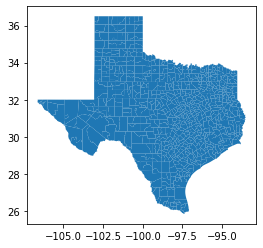

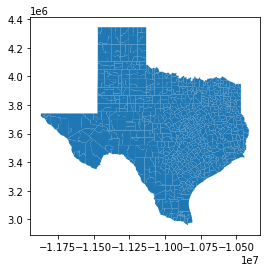

In [38]:

ax = texas.plot()

texas2 = texas.to_crs("EPSG:3395") # gdf.to_crs(epsg=3395) would also work

ax = texas2.plot()